# Task 1: Data Handling

In [2]:
import pandas as pd
import os

# Step 1: Define the folder containing your CSV files
folder_path = r"C:\Users\Acer\Downloads\beijing+multi+site+air+quality+data\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228"

In [4]:
# Step 2: List all CSV files in the folder (only .csv files)
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

In [6]:
# Step 3: Load and merge all files into one DataFrame
merged_df = pd.DataFrame()  # Empty DF to append into

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    # Load CSV
    df = pd.read_csv(file_path)
    
    # If station column is missing, extract from filename
    if 'station' not in df.columns:
        station_name = file.split("_")[2]  # Example: "Aotizhongxin" from PRSA_Data_Aotizhongxin...
        df['station'] = station_name
    
    merged_df = pd.concat([merged_df, df], ignore_index=True)
    print(f"Loaded {file} | Shape: {df.shape}")

Loaded Merged_All_Stations.csv | Shape: (2103840, 18)
Loaded PRSA_Data_Aotizhongxin_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Changping_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Dingling_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Dongsi_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Guanyuan_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Gucheng_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Huairou_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Nongzhanguan_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Shunyi_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Tiantan_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Wanliu_20130301-20170228.csv | Shape: (35064, 18)
Loaded PRSA_Data_Wanshouxigong_20130301-20170228.csv | Shape: (35064, 18)


In [7]:
# Step 4: Show merged DataFrame info
print("\n✅ Merged Data Info:")
print("Shape:", merged_df.shape)
print("Columns:", merged_df.columns.tolist())
print("\nMissing values per column:")
print(merged_df.isnull().sum())


✅ Merged Data Info:
Shape: (2524608, 18)
Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values per column:
No              0
year            0
month           0
day             0
hour            0
PM2.5       52434
PM10        38694
SO2         54126
NO2         72696
CO         124206
O3          79662
TEMP         2388
PRES         2358
DEWP         2418
RAIN         2340
wd          10932
WSPM         1908
station         0
dtype: int64


In [10]:
# Step 5: Save merged dataset to CSV
output_path = os.path.join(folder_path, "Merged_All_Stations.csv")
merged_df.to_csv(output_path, index=False)
print(f"\n📁 Merged dataset saved at: {output_path}")


📁 Merged dataset saved at: C:\Users\Acer\Downloads\beijing+multi+site+air+quality+data\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228\Merged_All_Stations.csv


In [11]:
# Step 6: Display first few rows
merged_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Task 2: Exploratory Data Analysis (EDA)

In [15]:
# Loading the Merged Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged CSV
file_path = r"C:\Users\Acer\Downloads\beijing+multi+site+air+quality+data\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228\Merged_All_Stations.csv"
df = pd.read_csv(file_path)

# Display basic info
df.shape, df.columns

((2524608, 18),
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'))

## Task 2a: Fundamental Data Understanding

In [17]:
# Number of rows and columns
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (2524608, 18)


In [20]:
# Data types
print("\nData Types:")
df.dtypes


Data Types:


No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [22]:
# Missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
No              0
year            0
month           0
day             0
hour            0
PM2.5       52434
PM10        38694
SO2         54126
NO2         72696
CO         124206
O3          79662
TEMP         2388
PRES         2358
DEWP         2418
RAIN         2340
wd          10932
WSPM         1908
station         0
dtype: int64


In [23]:
# Unique stations
print("\nUnique Monitoring Stations:")
df['station'].unique()


Unique Monitoring Stations:


array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [25]:
# Basic descriptive stats
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,2.524608e+06,2.524608e+06,2.524608e+06,2.524608e+06,2.524608e+06,2.472174e+06,2.485914e+06,2.470482e+06,2.451912e+06,2.400402e+06,2.444946e+06,2.522220e+06,2.522250e+06,2.522190e+06,2.522268e+06,2.522700e+06
mean,1.753250e+04,2.014663e+03,6.522930e+00,1.572964e+01,1.150000e+01,7.979343e+01,1.046026e+02,1.583083e+01,5.063859e+01,1.230766e+03,5.737227e+01,1.353898e+01,1.010747e+03,2.490822e+00,6.447578e-02,1.729711e+00
std,1.012211e+04,1.177197e+00,3.448704e+00,8.800094e+00,6.922188e+00,8.082231e+01,9.177233e+01,2.165058e+01,3.512788e+01,1.160182e+03,5.666155e+01,1.143613e+01,1.047404e+01,1.379383e+01,8.210033e-01,1.246384e+00
min,1.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.856000e-01,1.026500e+00,1.000000e+02,2.142000e-01,-1.990000e+01,9.824000e+02,-4.340000e+01,0.000000e+00,0.000000e+00
25%,8.766750e+03,2.014000e+03,4.000000e+00,8.000000e+00,5.750000e+00,2.000000e+01,3.600000e+01,3.000000e+00,2.300000e+01,5.000000e+02,1.100000e+01,3.100000e+00,1.002300e+03,-8.900000e+00,0.000000e+00,9.000000e-01
50%,1.753250e+04,2.015000e+03,7.000000e+00,1.600000e+01,1.150000e+01,5.500000e+01,8.200000e+01,7.000000e+00,4.300000e+01,9.000000e+02,4.500000e+01,1.450000e+01,1.010400e+03,3.100000e+00,0.000000e+00,1.400000e+00
75%,2.629825e+04,2.016000e+03,1.000000e+01,2.300000e+01,1.725000e+01,1.110000e+02,1.450000e+02,2.000000e+01,7.100000e+01,1.500000e+03,8.200000e+01,2.330000e+01,1.019000e+03,1.510000e+01,0.000000e+00,2.200000e+00
max,3.506400e+04,2.017000e+03,1.200000e+01,3.100000e+01,2.300000e+01,9.990000e+02,9.990000e+02,5.000000e+02,2.900000e+02,1.000000e+04,1.071000e+03,4.160000e+01,1.042800e+03,2.910000e+01,7.250000e+01,1.320000e+01


## Task 2b: Data Preprocessing

In [28]:
# 1. Drop duplicates
df.drop_duplicates(inplace=True)

In [29]:
# Define pollutant and weather columns
pollutant_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
numeric_weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']  # exclude 'wd'
categorical_weather_col = 'wd'

# Interpolate only numeric columns
df[pollutant_cols + numeric_weather_cols] = df[pollutant_cols + numeric_weather_cols].interpolate(method='linear')

# Fill missing wind direction with the most frequent value (mode)
df[categorical_weather_col].fillna(df[categorical_weather_col].mode()[0], inplace=True)

# Final missing value check
print("\n✅ Missing values after interpolation + fill:")
print(df.isnull().sum())


✅ Missing values after interpolation + fill:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


C:\Users\Acer\AppData\Local\Temp\ipykernel_18456\1325848578.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[categorical_weather_col].fillna(df[categorical_weather_col].mode()[0], inplace=True)


In [30]:
# 3. Feature Engineering
# Convert time columns to datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Extract new time-based features
df['month_name'] = df['datetime'].dt.month_name()
df['weekday'] = df['datetime'].dt.day_name()
df['hour_of_day'] = df['datetime'].dt.hour

# Reorder columns
cols = ['datetime', 'station'] + [col for col in df.columns if col not in ['datetime', 'station']]
df = df[cols]

## Task 2c: Statistical Analysis and Visualization

### Univariate Analysis (e.g., Distribution of PM2.5)

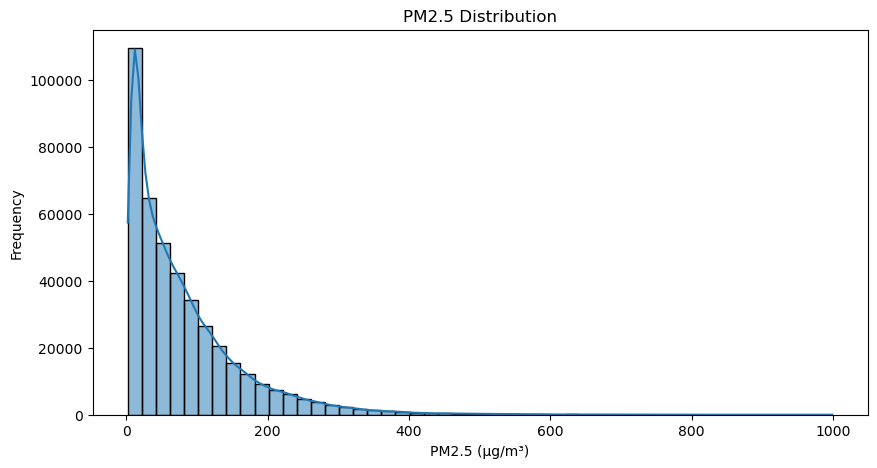

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PM2.5'], bins=50, kde=True)
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5 (μg/m³)")
plt.ylabel("Frequency")
plt.show()

### Bivariate Analysis (e.g., PM2.5 vs TEMP)

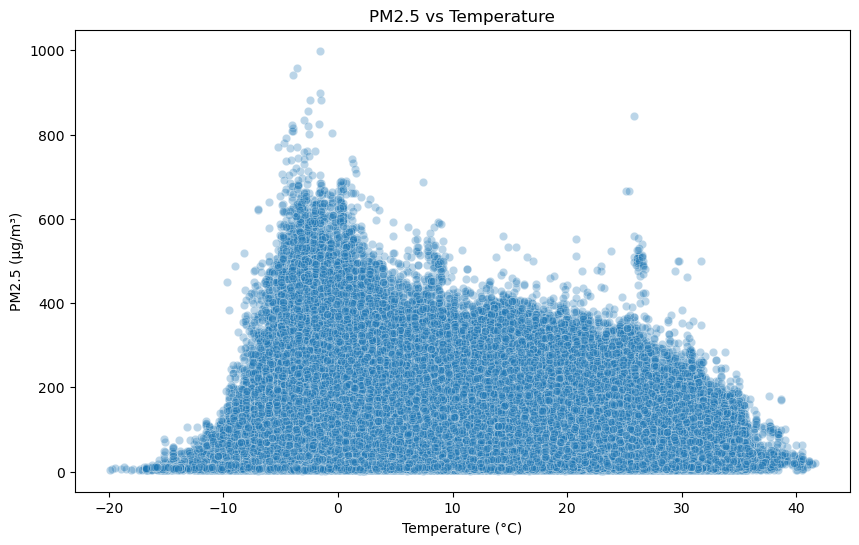

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='PM2.5', data=df, alpha=0.3)
plt.title("PM2.5 vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (μg/m³)")
plt.show()

### Multivariate Analysis (e.g., Correlation Heatmap)

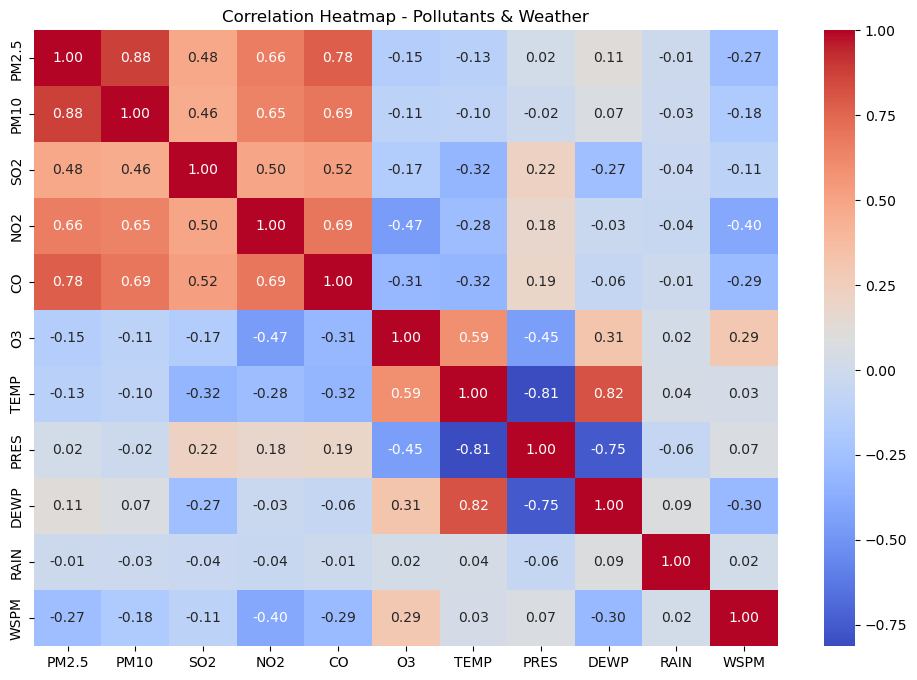

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Redefine weather_cols to exclude 'wd' for correlation
numeric_weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Compute correlation matrix with numeric columns only
plt.figure(figsize=(12, 8))
corr = df[pollutant_cols + numeric_weather_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Pollutants & Weather")
plt.show()

### Time Series: PM2.5 Trend Over Time (All Stations)

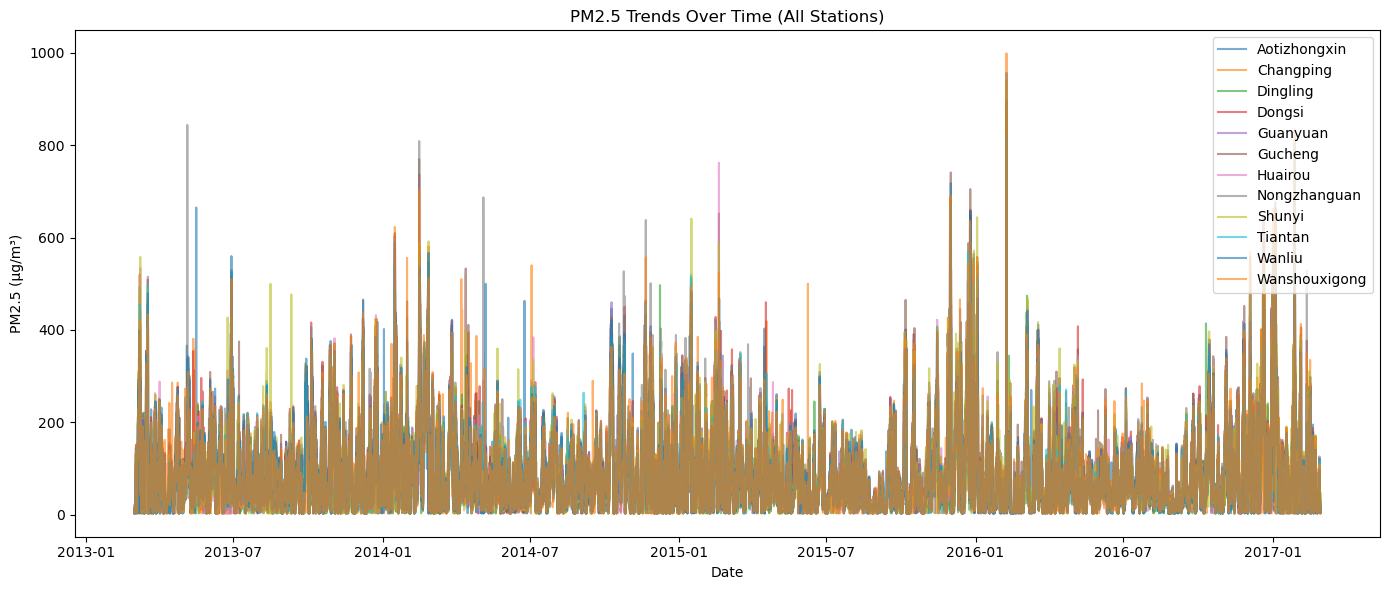

In [40]:
plt.figure(figsize=(14, 6))
for station in df['station'].unique():
    subset = df[df['station'] == station]
    plt.plot(subset['datetime'], subset['PM2.5'], label=station, alpha=0.6)

plt.legend(loc='upper right')
plt.title("PM2.5 Trends Over Time (All Stations)")
plt.xlabel("Date")
plt.ylabel("PM2.5 (μg/m³)")
plt.tight_layout()
plt.show()

# Task 3: Model Building

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing PM2.5 (target variable)
df = df[df['PM2.5'].notnull()]

# Select features
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month']
target = 'PM2.5'

# Feature engineering: extract hour, month
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month

# Encode wind direction using one-hot encoding
df_encoded = pd.get_dummies(df[['wd']], drop_first=True)
df = pd.concat([df, df_encoded], axis=1)
features += list(df_encoded.columns)

# Final feature matrix and target
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Linear Regression

In [46]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n🔵 Linear Regression:")
print(f"RMSE: {np.sqrt(mse_lr):.2f}")
print(f"R² Score: {r2_lr:.4f}")


🔵 Linear Regression:
RMSE: 31.64
R² Score: 0.8469


## Model 2: XGBoost Regressor

In [49]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n🟠 XGBoost Regressor:")
print(f"RMSE: {np.sqrt(mse_xgb):.2f}")
print(f"R² Score: {r2_xgb:.4f}")



🟠 XGBoost Regressor:
RMSE: 21.41
R² Score: 0.9299


In [50]:
import joblib

# Save trained model
joblib.dump(xgb, "xgb_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved as xgb_model.pkl and scaler.pkl")

✅ Model and scaler saved as xgb_model.pkl and scaler.pkl


# Task 4: Application Development

In [59]:
#pip install streamlit xgboost scikit-learn pandas matplotlib seaborn

In [61]:
#pip install streamlit xgboost scikit-learn matplotlib seaborn pandas

In [63]:
#pip install streamlit

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import joblib

# Load model and scaler
model = joblib.load("xgb_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load preprocessed data (must match training)
df = pd.read_csv(r"C:\Users\Acer\Downloads\beijing+multi+site+air+quality+data\PRSA2017_Data_20130301-20170228\PRSA_Data_20130301-20170228\Merged_All_Stations.csv")
df.drop_duplicates(inplace=True)
df = df[df['PM2.5'].notnull()]
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df = pd.get_dummies(df, columns=['wd'], drop_first=True)

# Define features (must match model training)
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour', 'month'] + [col for col in df.columns if col.startswith('wd_')]

# GUI Setup
root = tk.Tk()
root.title("Beijing Air Quality GUI")
root.geometry("1000x700")

notebook = ttk.Notebook(root)
notebook.pack(fill='both', expand=True)

# Page 1: Data Overview
page1 = ttk.Frame(notebook)
notebook.add(page1, text="Data Overview")

def show_data_overview():
    for widget in page1.winfo_children():
        widget.destroy()
    shape_label = tk.Label(page1, text=f"Dataset Shape: {df.shape}", font=('Arial', 12))
    shape_label.pack(pady=5)
    columns_label = tk.Label(page1, text=f"Columns: {', '.join(df.columns[:10])}...", wraplength=900, font=('Arial', 11))
    columns_label.pack(pady=5)
    sample = df.head(5).to_string()
    sample_text = tk.Text(page1, height=10, width=120)
    sample_text.insert(tk.END, sample)
    sample_text.pack()

show_data_overview()

# Page 2: EDA
page2 = ttk.Frame(notebook)
notebook.add(page2, text="Exploratory Data Analysis")

def plot_eda():
    for widget in page2.winfo_children():
        widget.destroy()

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].hist(df['PM2.5'], bins=50, color='skyblue', edgecolor='black')
    axs[0].set_title('PM2.5 Distribution')
    axs[0].set_xlabel('PM2.5')
    axs[0].set_ylabel('Frequency')

    axs[1].scatter(df['TEMP'], df['PM2.5'], alpha=0.3)
    axs[1].set_title('PM2.5 vs TEMP')
    axs[1].set_xlabel('Temperature')
    axs[1].set_ylabel('PM2.5')

    canvas = FigureCanvasTkAgg(fig, master=page2)
    canvas.draw()
    canvas.get_tk_widget().pack()

plot_eda()

# Page 3: Modeling and Prediction
page3 = ttk.Frame(notebook)
notebook.add(page3, text="Modeling and Prediction")

def predict_pm25():
    try:
        input_data = [float(entries[feature].get()) for feature in features]
        input_scaled = scaler.transform([input_data])
        pred = model.predict(input_scaled)[0]
        messagebox.showinfo("Prediction", f"Predicted PM2.5: {pred:.2f} μg/m³")
    except Exception as e:
        messagebox.showerror("Error", str(e))

entries = {}
for i, feature in enumerate(features):
    label = tk.Label(page3, text=feature, font=('Arial', 10))
    label.grid(row=i, column=0, padx=10, pady=3, sticky='e')
    entry = tk.Entry(page3, width=20)
    entry.grid(row=i, column=1, padx=10, pady=3)
    entries[feature] = entry

predict_btn = tk.Button(page3, text="Predict PM2.5", command=predict_pm25, bg='lightgreen')
predict_btn.grid(row=len(features), column=0, columnspan=2, pady=10)

root.mainloop()


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
